<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 

Author: [Yury Kashnitskiy](https://yorko.github.io). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

# <center>Topic 7. Unsupervised learning
## <center>Part 1. Principal Component Analysis
    
**This is mostly to demonstrate some applications of PCA, for theory, study [topic 7](https://mlcourse.ai/notebooks/blob/master/jupyter_english/topic07_unsupervised/topic7_pca_clustering.ipynb?flush_cache=true) in our course. <br> The notebook is used in lecture 7 recording, [part 1](https://youtu.be/-AswHf7h0I4).**



Singular value decomposition (SVD) of matrix $X$:

$$\Large X = UDV^T,$$

where $U \in R^{m \times m}$,  $V \in R^{n \times n}$ - are orthogonal matrices, and $D \in R^{m \times n}$ - is a diagonal matrix

<img src='../../img/svd_diag_matrix.png' width=70%>

### Principal Components Analysis
1. Define $k<d$ – a new dimension
2. Scale $X$: 
 - change $\Large x^{(i)}$ to $\Large  x^{(i)} - \frac{1}{m} \sum_{i=1}^{m}{x^{(i)}}$
 - $\Large  \sigma_j^2 = \frac{1}{m} \sum_{i=1}^{m}{(x^{(i)})^2}$
 - change $\Large x_j^{(i)}$ to $\Large \frac{x_j^{(i)}}{\sigma_j}$ 
4. Find singular value decomposition of $X$:
$$\Large X = UDV^T$$
5. Define $V =$ [$k$ left-most columns of $V$]
6. Return $$\Large Z = XV \in \mathbb{R}^{m \times k}$$

### 2D example

In [2]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

Proportion of variance explained by each component:
1st component - 0.94,
2nd component - 0.06

Directions of principal components:
1st component: [-0.57532172  0.81792721] 
2nd component: [-0.81792721 -0.57532172]


C:\Users\kan\AppData\Local\Temp\ipykernel_124576\3151935829.py:5: RuntimeWarning: covariance is not positive-semidefinite.
  X = np.random.multivariate_normal(mean, cov, 300)


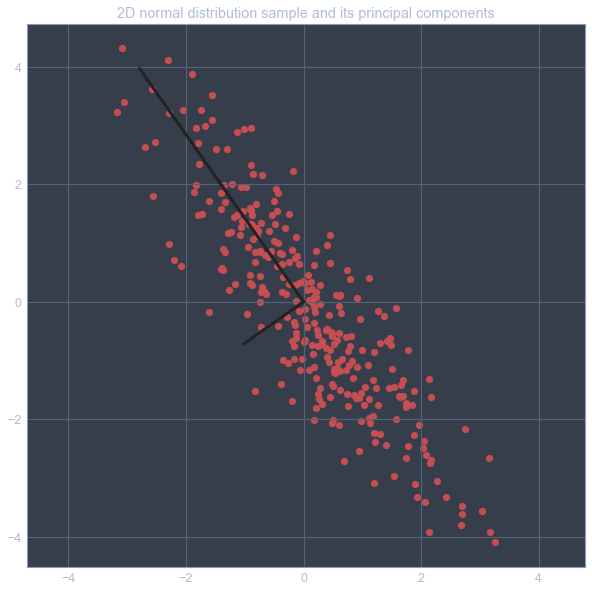

In [8]:
np.random.seed(0)
mean = np.array([0.0, 0.0])
cov = np.array([[1.0, -1.0], 
                [-2.0, 3.0]])
X = np.random.multivariate_normal(mean, cov, 300)

pca = PCA()
pca.fit(X)
print('Proportion of variance explained by each component:\n' 
      '1st component - %.2f,\n2nd component - %.2f\n' %
      tuple(pca.explained_variance_ratio_))
print('Directions of principal components:\n' 
      '1st component:', pca.components_[0],
      '\n2nd component:', pca.components_[1])

plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], s=50, c='r')
for l, v in zip(pca.explained_variance_ratio_, pca.components_):
    d = 5 * np.sqrt(l) * v
    plt.plot([0, d[0]], [0, d[1]], '-k', lw=3)
plt.axis('equal')
plt.title('2D normal distribution sample and its principal components')
plt.show()

1st principal component

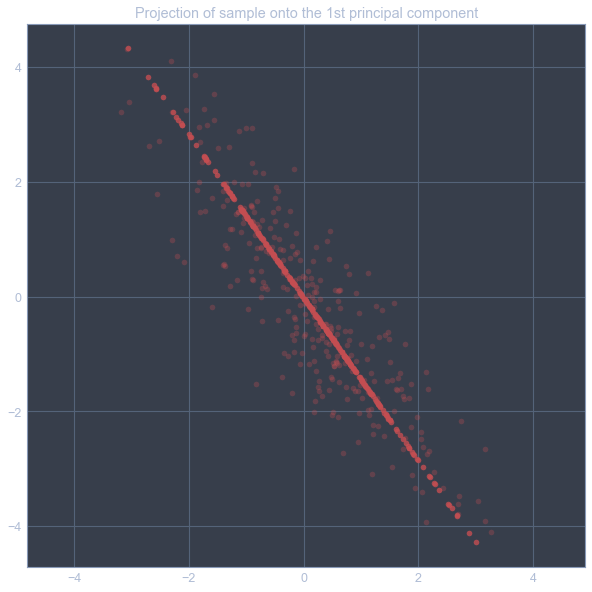

In [3]:
# Keep enough components to explain 90% of variance
pca = PCA(0.90)
X_reduced = pca.fit_transform(X)

# Map the reduced data into the initial feature space
X_new = pca.inverse_transform(X_reduced)

plt.figure(figsize=(10,10))
plt.plot(X[:, 0], X[:, 1], 'or', alpha=0.3)
plt.plot(X_new[:, 0], X_new[:, 1], 'or', alpha=0.8)
plt.axis('equal')
plt.title('Projection of sample onto the 1st principal component')
plt.show()

We have reduced the feature space dimensionality by half, while retaining the most significant features. This is the basic idea of dimensionality reduction - to approximate a multidimensional data set using data of a smaller dimension, while preserving as much information about the dataset as possible.

# Visualizing high-dimensional data

####  Iris example

Meaning of the 2 components:
0.361 x sepal length (cm) + -0.085 x sepal width (cm) + 0.857 x petal length (cm) + 0.358 x petal width (cm)
0.657 x sepal length (cm) + 0.730 x sepal width (cm) + -0.173 x petal length (cm) + -0.075 x petal width (cm)


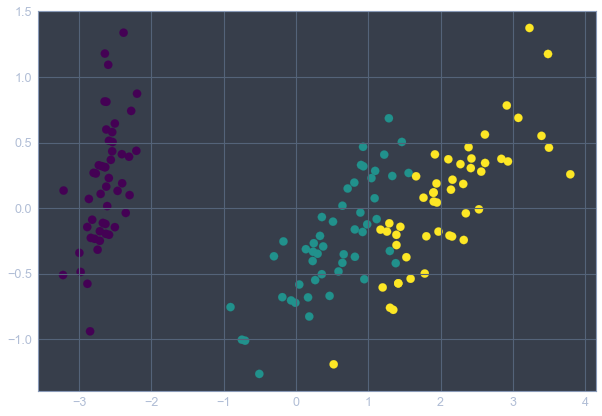

In [4]:
from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print("Meaning of the 2 components:")
for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            iris.feature_names)))
plt.figure(figsize=(10,7))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=70, cmap='viridis')
plt.show()

## Handwritten digits

Projecting 64-dimensional data to 2D


C:\Users\kan\AppData\Local\Temp\ipykernel_42580\4021965640.py:16: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


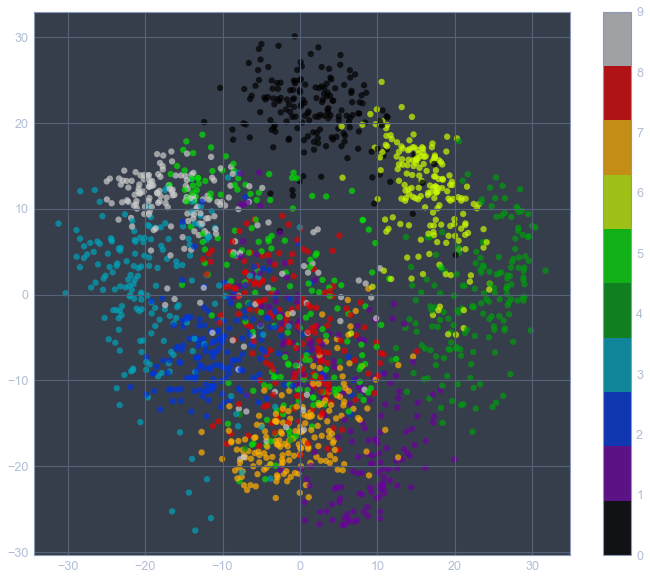

In [5]:
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.show()

Let's take a look at first 2 principal components

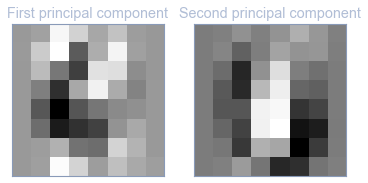

In [6]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

im = pca.components_[0]
ax1.imshow(im.reshape((8, 8)), cmap='binary')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('First principal component')

im = pca.components_[1]
ax2.imshow(im.reshape((8, 8)), cmap='binary')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('Second principal component')
plt.show()

###  Data compression

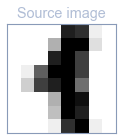

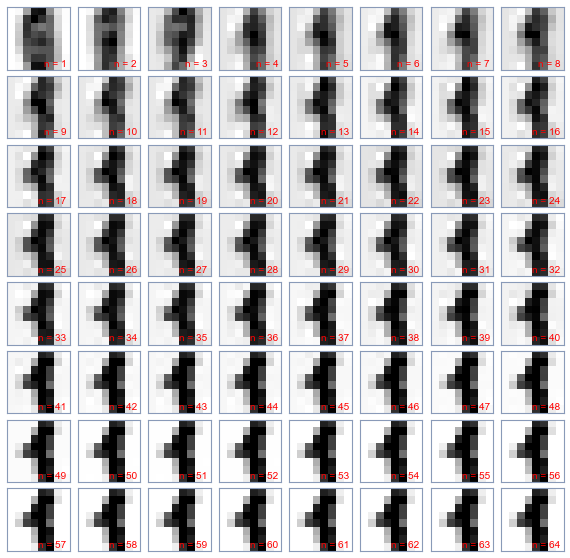

In [24]:
plt.figure(figsize=(4,2))
plt.imshow(X[11].reshape((8, 8)), cmap='binary')
plt.xticks([])
plt.yticks([])
plt.title('Source image')
plt.show()

fig, axes = plt.subplots(8, 8, figsize=(10, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    pca = PCA(i + 1).fit(X)
    im = pca.inverse_transform(pca.transform(X[11].reshape(1, -1)))

    ax.imshow(im.reshape((8, 8)), cmap='binary')
    ax.text(0.95, 0.05, 'n = {0}'.format(i + 1), ha='right',
            transform=ax.transAxes, color='red')
    ax.set_xticks([])
    ax.set_yticks([])

How many components to choose? Typically, they leave at least 90% of data variance to be preserved.

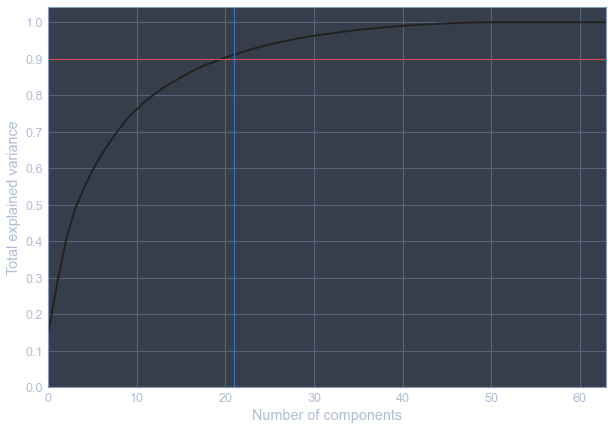

In [8]:
pca = PCA().fit(X)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(21, c='b')
plt.axhline(0.9, c='r')
plt.show()

In [9]:
pca = PCA(0.9).fit(X)
print('We need %d components to explain 90%% of variance' 
      % pca.n_components_)

We need 21 components to explain 90% of variance


### PCA as preprocessing

PCA often serves as a preprocessing technique. Let's take a look at a face recognition task 

In [10]:
%%time
from sklearn import datasets
from sklearn.model_selection import train_test_split

lfw_people = datasets.fetch_lfw_people(min_faces_per_person=50, 
                resize=0.4, data_home='../../data/faces')

print('%d objects, %d features, %d classes' % (lfw_people.data.shape[0],
      lfw_people.data.shape[1], len(lfw_people.target_names)))
print('\nPersons:')
for name in lfw_people.target_names:
    print(name)

1560 objects, 1850 features, 12 classes

Persons:
Ariel Sharon
Colin Powell
Donald Rumsfeld
George W Bush
Gerhard Schroeder
Hugo Chavez
Jacques Chirac
Jean Chretien
John Ashcroft
Junichiro Koizumi
Serena Williams
Tony Blair
CPU times: total: 24.3 s
Wall time: 1min 24s


Target class distribution:

In [11]:
for i, name in enumerate(lfw_people.target_names):
    print("{}: {} photos.".format(name, (lfw_people.target == i).sum()))

Ariel Sharon: 77 photos.
Colin Powell: 236 photos.
Donald Rumsfeld: 121 photos.
George W Bush: 530 photos.
Gerhard Schroeder: 109 photos.
Hugo Chavez: 71 photos.
Jacques Chirac: 52 photos.
Jean Chretien: 55 photos.
John Ashcroft: 53 photos.
Junichiro Koizumi: 60 photos.
Serena Williams: 52 photos.
Tony Blair: 144 photos.


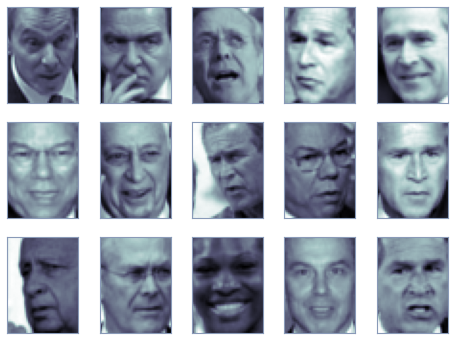

In [12]:
fig = plt.figure(figsize=(8, 6))

for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(lfw_people.images[i], cmap='bone')

In [13]:
X_train, X_test, y_train, y_test = \
    train_test_split(lfw_people.data, lfw_people.target, random_state=0)

print('Train size:', X_train.shape[0], 'Test size:', X_test.shape[0])

Train size: 1170 Test size: 390


Here we resort to `RandomizedPCA` (a bit more efficient algorithm) to find first 100 principal components which retain >90% variance.  

100 principal components explain 92.70% of variance


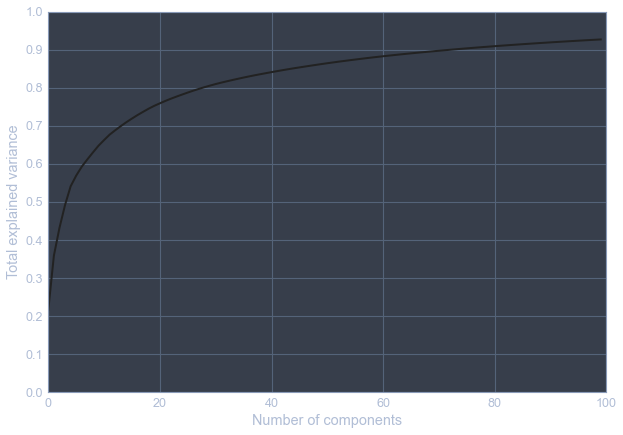

In [14]:
pca = PCA(n_components=100, svd_solver='randomized')
pca.fit(X_train)

print('100 principal components explain %.2f%% of variance' %
      (100 * np.cumsum(pca.explained_variance_ratio_)[-1]))
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), lw=2, color='k')
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 100)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

First principal components. Nice features!

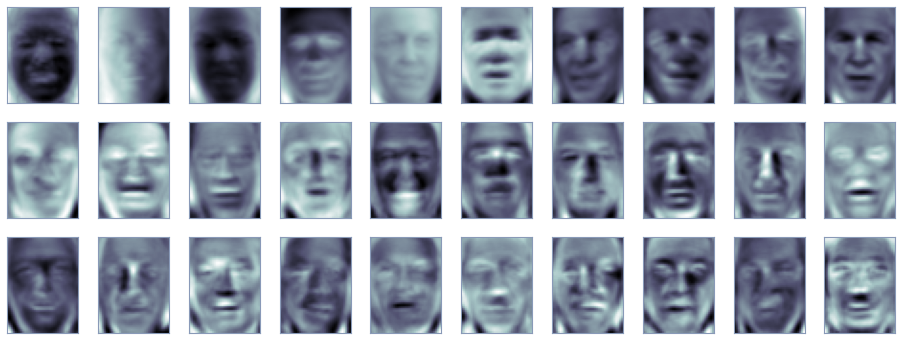

In [15]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape((50, 37)), cmap='bone')

"Mean face"

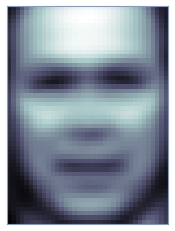

In [16]:
plt.imshow(pca.mean_.reshape((50, 37)), cmap='bone')
plt.xticks([])
plt.yticks([])
plt.show()

Now let's perform classification after we reduced dimensionality from 1850 features to only 100.
We'll fit a softmax classifier, a.k.a multinomial logistic regression.

In [17]:
%%time
from sklearn.linear_model import LogisticRegression

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

CPU times: total: 0 ns
Wall time: 10 ms


In [18]:
clf = LogisticRegression(multi_class='multinomial', 
                         random_state=17, solver='lbfgs', 
                         max_iter=10000)
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)

C:\Users\kan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C:\Users\kan\AppData\Local\Temp\ipykernel_42580\1242295615.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(im, shrink=0.71)


Accuracy: 0.720513
                   precision    recall  f1-score   support

     Ariel Sharon       0.47      0.53      0.50        15
     Colin Powell       0.75      0.72      0.73        65
  Donald Rumsfeld       0.55      0.55      0.55        29
    George W Bush       0.84      0.81      0.82       133
Gerhard Schroeder       0.71      0.67      0.69        33
      Hugo Chavez       0.67      0.75      0.71        16
   Jacques Chirac       0.60      0.25      0.35        12
    Jean Chretien       0.44      0.40      0.42        10
    John Ashcroft       0.88      0.78      0.82        18
Junichiro Koizumi       0.61      1.00      0.76        11
  Serena Williams       0.72      0.68      0.70        19
       Tony Blair       0.62      0.79      0.70        29

         accuracy                           0.72       390
        macro avg       0.65      0.66      0.65       390
     weighted avg       0.73      0.72      0.72       390



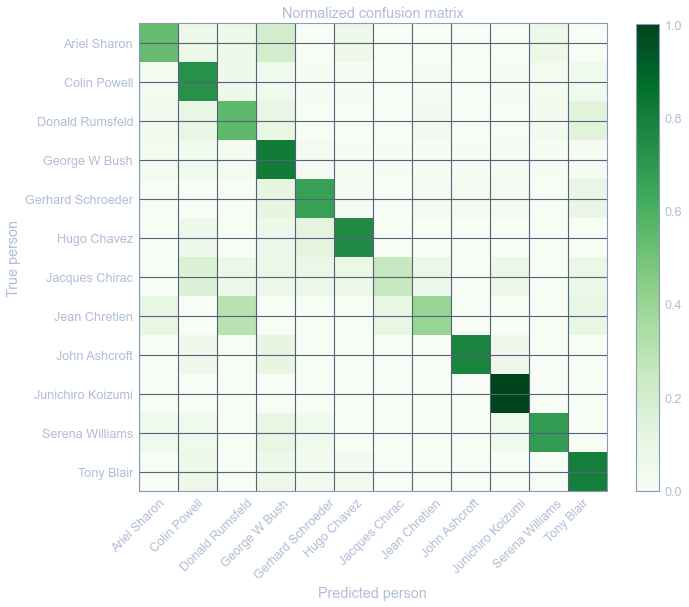

In [19]:
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix)

print("Accuracy: %f" % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=lfw_people.target_names))

M = confusion_matrix(y_test, y_pred)
M_normalized = M.astype('float') / M.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10,10))
im = plt.imshow(M_normalized, interpolation='nearest', cmap='Greens')
plt.colorbar(im, shrink=0.71)
tick_marks = np.arange(len(lfw_people.target_names))
plt.xticks(tick_marks - 0.5, lfw_people.target_names, rotation=45)
plt.yticks(tick_marks, lfw_people.target_names)
plt.tight_layout()
plt.ylabel('True person')
plt.xlabel('Predicted person')
plt.title('Normalized confusion matrix')
plt.show()

Let's compare this result with the case when we train the model with all initial 1850 features.

In [20]:
%%time
clf = LogisticRegression(multi_class='multinomial', 
                         random_state=17, solver='lbfgs', 
                         max_iter=10000)
clf.fit(X_train, y_train)
y_pred_full = clf.predict(X_test)

CPU times: total: 47.8 s
Wall time: 8.19 s


In [21]:
print("Accuracy: %f" % accuracy_score(y_test, y_pred_full))

Accuracy: 0.792308


Well.. didn't work out as a cool example for illustration, logistic regression is still trained pretty fast with 1850 features, but accuracy is 79%, quite remarkably higher than 72%. But for images of higher resolution, and with heavier models, the difference in training time will be much more remarkable.

## Some references
- [PCA wiki page](https://en.wikipedia.org/wiki/Principal_component_analysis)
- [PCA in 3 steps](http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html)
- [SVD wiki page](https://en.wikipedia.org/wiki/Singular_value_decomposition)
- [Eigenface](https://en.wikipedia.org/wiki/Eigenface)
- [sklearn.decomposition](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition)